In [1]:
import pandas as pd
import numpy as np
import json
import csv
import os
from PIL import Image

# Load JSON and prepare Data Frame

In [2]:
df = pd.read_json('s12_dataset.json').T

In [3]:
df.index = np.arange(0, len(df))
df.head()

,filename,size,regions,file_attributes
0,img_001.jpg,116338,"[{'shape_attributes': {'name': 'rect', 'x': 70...",{}
1,img_002.jpg,204699,"[{'shape_attributes': {'name': 'rect', 'x': 76...",{}
2,img_003.jpg,66270,"[{'shape_attributes': {'name': 'rect', 'x': 49...",{}
3,img_004.jpg,12112,"[{'shape_attributes': {'name': 'rect', 'x': 13...",{}
4,img_005.jpg,325017,"[{'shape_attributes': {'name': 'rect', 'x': 88...",{}


In [4]:
df = df.explode('regions')
df.reset_index(inplace=True,drop=True)

In [5]:
df

,filename,size,regions,file_attributes
0,img_001.jpg,116338,"{'shape_attributes': {'name': 'rect', 'x': 706...",{}
1,img_001.jpg,116338,"{'shape_attributes': {'name': 'rect', 'x': 593...",{}
2,img_002.jpg,204699,"{'shape_attributes': {'name': 'rect', 'x': 762...",{}
3,img_003.jpg,66270,"{'shape_attributes': {'name': 'rect', 'x': 498...",{}
4,img_004.jpg,12112,"{'shape_attributes': {'name': 'rect', 'x': 132...",{}
...,...,...,...,...
254,img_108.jpg,15326,"{'shape_attributes': {'name': 'rect', 'x': 229...",{}
255,img_109.jpg,10476,"{'shape_attributes': {'name': 'rect', 'x': 77,...",{}
256,img_109.jpg,10476,"{'shape_attributes': {'name': 'rect', 'x': 20,...",{}
257,img_110.jpg,75357,"{'shape_attributes': {'name': 'rect', 'x': 318...",{}


In [6]:
df.drop(df.columns[[1, 3]], axis = 1, inplace = True)

In [7]:
df

,filename,regions
0,img_001.jpg,"{'shape_attributes': {'name': 'rect', 'x': 706..."
1,img_001.jpg,"{'shape_attributes': {'name': 'rect', 'x': 593..."
2,img_002.jpg,"{'shape_attributes': {'name': 'rect', 'x': 762..."
3,img_003.jpg,"{'shape_attributes': {'name': 'rect', 'x': 498..."
4,img_004.jpg,"{'shape_attributes': {'name': 'rect', 'x': 132..."
...,...,...
254,img_108.jpg,"{'shape_attributes': {'name': 'rect', 'x': 229..."
255,img_109.jpg,"{'shape_attributes': {'name': 'rect', 'x': 77,..."
256,img_109.jpg,"{'shape_attributes': {'name': 'rect', 'x': 20,..."
257,img_110.jpg,"{'shape_attributes': {'name': 'rect', 'x': 318..."


In [8]:
attrs = pd.DataFrame(pd.DataFrame(df['regions'].tolist())['shape_attributes'].tolist()).copy()
attrs.drop(attrs.columns[[0]], axis = 1, inplace = True)
attrs

,x,y,width,height
0,706,47,286,189
1,593,434,524,195
2,762,222,203,213
3,498,281,130,95
4,132,119,53,40
...,...,...,...,...
254,229,38,69,47
255,77,92,47,64
256,20,124,25,32
257,318,104,132,181


In [9]:
classes = pd.DataFrame(pd.DataFrame(df['regions'].tolist())['region_attributes'].tolist()).copy()

In [10]:
classes = pd.get_dummies(classes)

In [11]:
df = pd.concat((df['filename'],attrs,classes),1)

In [12]:
df

,filename,x,y,width,height,class_boots,class_hardhat,class_mask,class_vest
0,img_001.jpg,706,47,286,189,0,1,0,0
1,img_001.jpg,593,434,524,195,0,0,0,1
2,img_002.jpg,762,222,203,213,0,0,1,0
3,img_003.jpg,498,281,130,95,0,0,1,0
4,img_004.jpg,132,119,53,40,0,0,1,0
...,...,...,...,...,...,...,...,...,...
254,img_108.jpg,229,38,69,47,1,0,0,0
255,img_109.jpg,77,92,47,64,1,0,0,0
256,img_109.jpg,20,124,25,32,1,0,0,0
257,img_110.jpg,318,104,132,181,1,0,0,0


In [13]:
def get_image_dims(folder_path):
    filenames = os.listdir(folder_path)
    csv_contents = [["filename","widht","height"]]
    for fl in filenames:
        img = Image.open(os.path.join(folder_path, fl))
        w, h = img.size
        csv_contents.append([fl, w, h])
    img_size = pd.DataFrame(csv_contents)
    return(img_size)

In [14]:
path = r'.\DataSet'

In [15]:
filenames = os.listdir(path)

In [16]:
img_dim= []
for fl in filenames:
    img = Image.open(os.path.join(path, fl))
    w, h = img.size
    img_dim.append([fl, w, h])

In [17]:
img_dim = pd.DataFrame(img_dim, columns=['filename','img_width', 'img_height'])

In [18]:
img_dim

,filename,img_width,img_height
0,img_001.jpg,1125,632
1,img_002.jpg,1600,1168
2,img_003.jpg,1024,683
3,img_004.jpg,225,225
4,img_005.jpg,1024,683
...,...,...,...
105,img_106.jpg,1600,918
106,img_107.jpg,273,185
107,img_108.jpg,300,168
108,img_109.jpg,262,192


In [19]:
df = df.merge(img_dim, how='outer', on='filename')

In [20]:
col_names = ['filename', 'img_width', 'img_height', 'x', 'y', 'width', 'height', 'class_boots', 'class_hardhat',
       'class_mask', 'class_vest']
df = df.reindex(columns=col_names)
df

,filename,img_width,img_height,x,y,width,height,class_boots,class_hardhat,class_mask,class_vest
0,img_001.jpg,1125,632,706,47,286,189,0,1,0,0
1,img_001.jpg,1125,632,593,434,524,195,0,0,0,1
2,img_002.jpg,1600,1168,762,222,203,213,0,0,1,0
3,img_003.jpg,1024,683,498,281,130,95,0,0,1,0
4,img_004.jpg,225,225,132,119,53,40,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
254,img_108.jpg,300,168,229,38,69,47,1,0,0,0
255,img_109.jpg,262,192,77,92,47,64,1,0,0,0
256,img_109.jpg,262,192,20,124,25,32,1,0,0,0
257,img_110.jpg,780,500,318,104,132,181,1,0,0,0


In [21]:
df.rename(columns = {'x': 'bb_x', 'y': 'bb_y', 'width': 'bb_width', 'height': 'bb_height'}, inplace = True)

In [22]:
df

,filename,img_width,img_height,bb_x,bb_y,bb_width,bb_height,class_boots,class_hardhat,class_mask,class_vest
0,img_001.jpg,1125,632,706,47,286,189,0,1,0,0
1,img_001.jpg,1125,632,593,434,524,195,0,0,0,1
2,img_002.jpg,1600,1168,762,222,203,213,0,0,1,0
3,img_003.jpg,1024,683,498,281,130,95,0,0,1,0
4,img_004.jpg,225,225,132,119,53,40,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
254,img_108.jpg,300,168,229,38,69,47,1,0,0,0
255,img_109.jpg,262,192,77,92,47,64,1,0,0,0
256,img_109.jpg,262,192,20,124,25,32,1,0,0,0
257,img_110.jpg,780,500,318,104,132,181,1,0,0,0


In [27]:
df['img_width_n']  = df['img_width'].div(df['img_width'])
df['img_height_n'] = df['img_height'].div(df['img_height'])
df['bb_width_n']     = df['bb_width'].div(df['img_width'])
df['bb_height_n']    = df['bb_height'].div(df['img_height'])

df.head()

,filename,img_width,img_height,bb_x,bb_y,bb_width,bb_height,class_boots,class_hardhat,class_mask,class_vest,img_width_n,img_height_n,bb_width_n,bb_height_n
0,img_001.jpg,1125,632,706,47,286,189,0,1,0,0,1.0,1.0,0.254222,0.299051
1,img_001.jpg,1125,632,593,434,524,195,0,0,0,1,1.0,1.0,0.465778,0.308544
2,img_002.jpg,1600,1168,762,222,203,213,0,0,1,0,1.0,1.0,0.126875,0.182363
3,img_003.jpg,1024,683,498,281,130,95,0,0,1,0,1.0,1.0,0.126953,0.139092
4,img_004.jpg,225,225,132,119,53,40,0,0,1,0,1.0,1.0,0.235556,0.177778


In [30]:
table_for_algo = df[df.columns[len(df.columns)-2:]]
table_for_algo.head()

,bb_width_n,bb_height_n
0,0.254222,0.299051
1,0.465778,0.308544
2,0.126875,0.182363
3,0.126953,0.139092
4,0.235556,0.177778


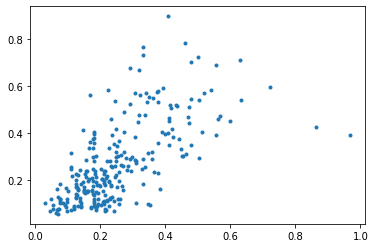

In [32]:
import matplotlib.pyplot as plt
plt.plot(table_for_algo['bb_width_n'],table_for_algo['bb_height_n'],'.')

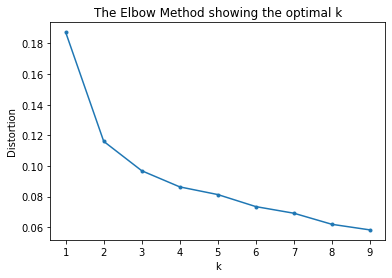

In [33]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt



# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(table_for_algo)
    kmeanModel.fit(table_for_algo)
    distortions.append(sum(np.min(cdist(table_for_algo, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /table_for_algo.shape[0])

# Plot the elbow
plt.plot(K, distortions, '.-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [44]:
height = list(table_for_algo['bb_height_n'])
width  = list(table_for_algo['bb_width_n'])
ks = range(1,10)
meaniou = []
for k in ks:
    cl = KMeans(n_clusters=k)
    cl.fit(table_for_algo)
    cx = []
    cy = []
    mapcx  = {}
    mapcy = {}
    iou = []
    for i in range(259):
        l = cl.labels_[i]
        cx.append(cl.cluster_centers_[l][0])
        cy.append(cl.cluster_centers_[l][1])
        iou.append(min(width[i] ,cx[i])* min(height[i] , cy[i])/(height[i]*width[i]+ cx[i]*cy[i]- min(width[i] , cx[i])* min(height[i] ,cy[i])))
    meaniou.append(sum(iou)/50)

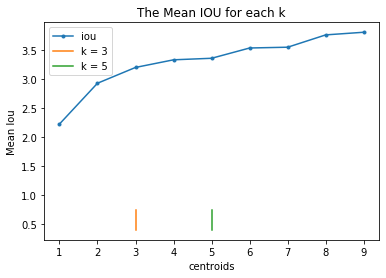

In [45]:
plt.plot(range(1,10),meaniou,'.-',label = "iou")
plt.plot([3,3],[0.4,0.75],label = "k = 3")
plt.plot([5,5],[0.4,0.75],label = "k = 5")
plt.xlabel('centroids')
plt.ylabel('Mean Iou')
plt.title('The Mean IOU for each k')
plt.legend()
plt.show()

In [46]:
meaniou[3],meaniou[4],meaniou[5],meaniou[6]

(3.328210463033767, 3.3547304254973613, 3.5316585045302924, 3.545170488532233)

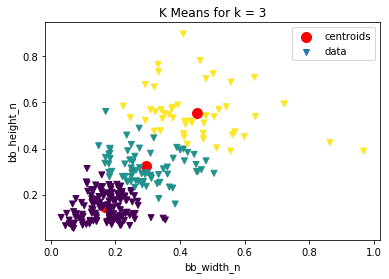

In [47]:
array_points = np.array(table_for_algo)
cl3 = KMeans(3)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(table_for_algo['bb_width_n']), list(table_for_algo['bb_height_n']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bb_width_n')
plt.ylabel('bb_height_n')
plt.title('K Means for k = 3')
plt.legend()
plt.show()

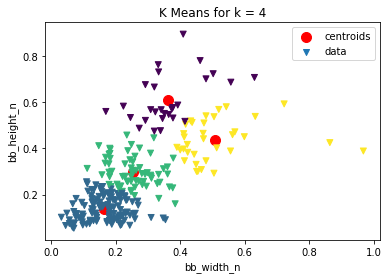

In [48]:
# array_points = np.array(table_for_algo)
cl3 = KMeans(4)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(table_for_algo['bb_width_n']), list(table_for_algo['bb_height_n']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bb_width_n')
plt.ylabel('bb_height_n')
plt.title('K Means for k = 4')
plt.legend()
plt.show()

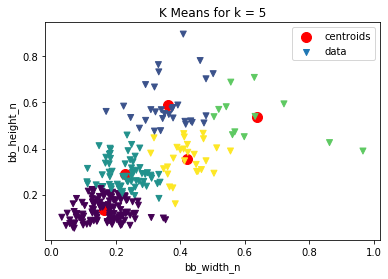

In [49]:
# array_points = np.array(table_for_algo)
cl3 = KMeans(5)
cl3.fit(array_points)

plt.scatter(cl3.cluster_centers_[:,0] ,cl3.cluster_centers_[:,1], color='red',s = 100,marker = 'o', label='centroids')
plt.scatter(list(table_for_algo['bb_width_n']), list(table_for_algo['bb_height_n']), marker="v",c=list(cl3.labels_.astype(float)), label = "data")
plt.legend()
plt.xlabel('bb_width_n')
plt.ylabel('bb_height_n')
plt.title('K Means for k = 5')
plt.legend()
plt.show()